# Correct image batch effects using color normalization

This tutorial demonstrates how to apply color normalization to H&E stained multi-section spatial transcriptomics data. Color normalization can be used to reduce the batch effects in images from different sections.

We will use the multi-section dataset as an example to illustrate the effect of color normalization.

## 1. Import necessary libraries

In [2]:
import torch
import numpy as np
import SpaHDmap as hdmap
import matplotlib.pyplot as plt

/home/qk/anaconda3/lib/python3.11/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


## 2. Set parameters and paths

Define the parameters and file paths for your analysis. Adjust `root_path` and `project` as needed to organize your results.

In [ ]:
rank = 20
seed = 123
verbose = True

np.random.seed(seed)
torch.manual_seed(seed)

root_path = '../experiments/'
project = 'multi_sections'
results_path = f'{root_path}/{project}/Results_color_norm/'

In [4]:
# Data paths for the multi-section dataset

Palbocilib_A = {
    'name': 'Palbocilib_A',
    'image_path': 'data/Palbocilib_A/Palbocilib_A.tif',
    'spot_coord_path': 'data/Palbocilib_A/Palbocilib_A_spot_coord.csv',
    'spot_exp_path': 'data/Palbocilib_A/Palbocilib_A_expression_nor_top5541SVGs.csv'
}

Palbocilib_B = {
    'name': 'Palbocilib_B',
    'image_path': 'data/Palbocilib_B/Palbocilib_B.tif',
    'spot_coord_path': 'data/Palbocilib_B/Palbocilib_B_spot_coord.csv',
    'spot_exp_path': 'data/Palbocilib_B/Palbocilib_B_expression_nor_top5541SVGs.csv'
}

Control_C = {
    'name': 'Control_C',
    'image_path': 'data/Control_C/Control_C.tif',
    'spot_coord_path': 'data/Control_C/Control_C_spot_coord.csv',
    'spot_exp_path': 'data/Control_C/Control_C_expression_nor_top5541SVGs.csv'
}

Control_D = {
    'name': 'Control_D',
    'image_path': 'data/Control_D/Control_D.tif',
    'spot_coord_path': 'data/Control_D/Control_D_spot_coord.csv',
    'spot_exp_path': 'data/Control_D/Control_D_expression_nor_top5541SVGs.csv'
}

# Set common scale rate and radius for all sections
scale_rate = 2
radius = 65

## 3. Load the data and pre-process

The data used in this tutorial is from the Medulloblastoma dataset, which contains 4 sections, could be downloaded from [Google Driver](https://drive.google.com/drive/folders/16L1nm3TzDDTFPVAaRXVKRp4LuCqvXbt2?usp=sharing).

We will load one section twice: once without color normalization and once with `color_norm=True` to observe the difference. We will also load all sections with color normalization for the multi-section analysis.

In [5]:
# Load Palbocilib_A without color normalization
pal_A_orig = hdmap.prepare_stdata(section_name=Palbocilib_A['name'] + '_Original',
                                  image_path=Palbocilib_A['image_path'],
                                  spot_coord_path=Palbocilib_A['spot_coord_path'],
                                  spot_exp_path=Palbocilib_A['spot_exp_path'],
                                  scale_rate=scale_rate,
                                  radius=radius,
                                  color_norm=False,
                                  swap_coord=False)

# Load Palbocilib_A with color normalization
pal_A_norm = hdmap.prepare_stdata(section_name=Palbocilib_A['name'] + '_Normalized',
                                  image_path=Palbocilib_A['image_path'],
                                  spot_coord_path=Palbocilib_A['spot_coord_path'],
                                  spot_exp_path=Palbocilib_A['spot_exp_path'],
                                  scale_rate=scale_rate,
                                  radius=radius,
                                  color_norm=True,
                                  swap_coord=False)


*** Reading and preparing data from scratch for section Palbocilib_A_Original ***


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:572: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = spot_coord.loc[adata.obs_names].values


Pre-processing gene expression data for 3073 spots and 5541 genes.


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:406: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:410: UserWarning: Data seems to be already normalized, skipping pre-processing.
  warnings.warn("Data seems to be already normalized, skipping pre-processing.")
/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


Processing image, seems to be HE image.
*** Reading and preparing data from scratch for section Palbocilib_A_Normalized ***


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:572: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = spot_coord.loc[adata.obs_names].values


Pre-processing gene expression data for 3073 spots and 5541 genes.


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:406: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:410: UserWarning: Data seems to be already normalized, skipping pre-processing.
  warnings.warn("Data seems to be already normalized, skipping pre-processing.")
/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


Processing image, seems to be HE image.
Applying Reinhard color normalization...


Let's visualize the original and color-normalized images to see the difference.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


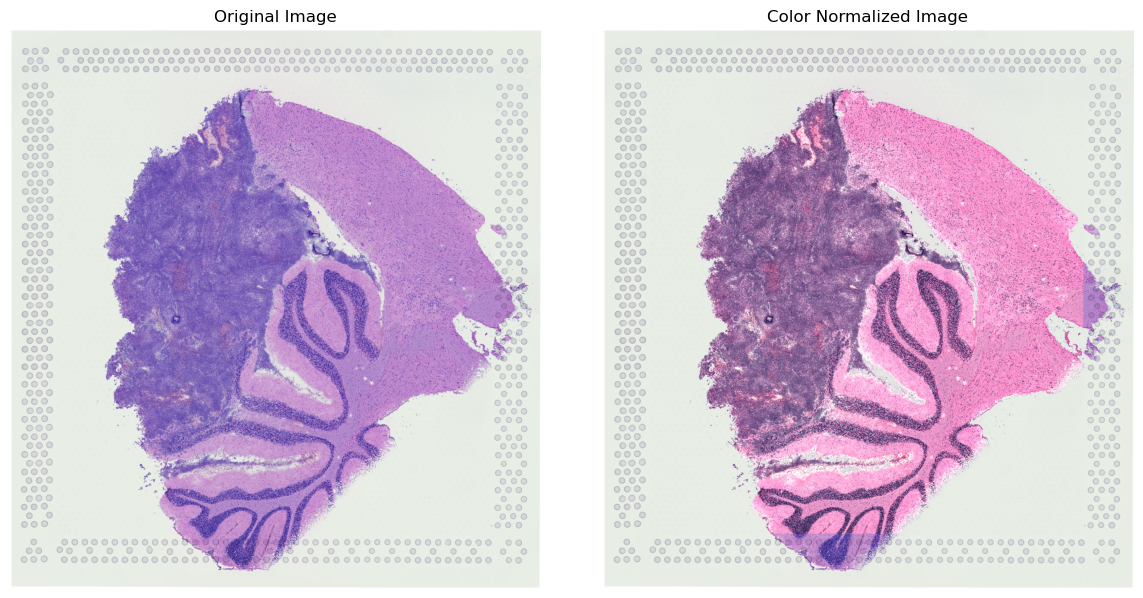

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(pal_A_orig.image.transpose(1, 2, 0))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pal_A_norm.image.transpose(1, 2, 0))
plt.title('Color Normalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Load all sections with color normalization for multi-section analysis. This will help in reducing batch effects and improving the comparability of results across different sections.

In [7]:
pal_A = hdmap.prepare_stdata(section_name=Palbocilib_A['name'],
                             image_path=Palbocilib_A['image_path'],
                             spot_coord_path=Palbocilib_A['spot_coord_path'],
                             spot_exp_path=Palbocilib_A['spot_exp_path'],
                             scale_rate=scale_rate,
                             radius=radius,
                             color_norm=True,
                             swap_coord=False)

pal_B = hdmap.prepare_stdata(section_name=Palbocilib_B['name'],
                             image_path=Palbocilib_B['image_path'],
                             spot_coord_path=Palbocilib_B['spot_coord_path'],
                             spot_exp_path=Palbocilib_B['spot_exp_path'],
                             scale_rate=scale_rate,
                             radius=radius,
                             color_norm=True,
                             swap_coord=False)

ctrl_C = hdmap.prepare_stdata(section_name=Control_C['name'],
                              image_path=Control_C['image_path'],
                              spot_coord_path=Control_C['spot_coord_path'],
                              spot_exp_path=Control_C['spot_exp_path'],
                              scale_rate=scale_rate,
                              radius=radius,
                              color_norm=True,
                              swap_coord=False)

ctrl_D = hdmap.prepare_stdata(section_name=Control_D['name'],
                              image_path=Control_D['image_path'],
                              spot_coord_path=Control_D['spot_coord_path'],
                              spot_exp_path=Control_D['spot_exp_path'],
                              scale_rate=scale_rate,
                              radius=radius,
                              color_norm=True,
                              swap_coord=False)

sections_list = [pal_A, pal_B, ctrl_C, ctrl_D]

print('All sections prepared with color normalization.')
for section in sections_list:
    print(section)

*** Reading and preparing data from scratch for section Palbocilib_A ***


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:572: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = spot_coord.loc[adata.obs_names].values


Pre-processing gene expression data for 3073 spots and 5541 genes.


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:406: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:410: UserWarning: Data seems to be already normalized, skipping pre-processing.
  warnings.warn("Data seems to be already normalized, skipping pre-processing.")
/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


Processing image, seems to be HE image.
Applying Reinhard color normalization...
*** Reading and preparing data from scratch for section Palbocilib_B ***


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:572: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = spot_coord.loc[adata.obs_names].values


Pre-processing gene expression data for 2957 spots and 5541 genes.


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:406: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:410: UserWarning: Data seems to be already normalized, skipping pre-processing.
  warnings.warn("Data seems to be already normalized, skipping pre-processing.")
/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


Processing image, seems to be HE image.
Applying Reinhard color normalization...
*** Reading and preparing data from scratch for section Control_C ***


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:572: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = spot_coord.loc[adata.obs_names].values


Pre-processing gene expression data for 4380 spots and 5541 genes.


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:406: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:410: UserWarning: Data seems to be already normalized, skipping pre-processing.
  warnings.warn("Data seems to be already normalized, skipping pre-processing.")


Processing image, seems to be HE image.
Applying Reinhard color normalization...
*** Reading and preparing data from scratch for section Control_D ***


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:572: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = spot_coord.loc[adata.obs_names].values


Pre-processing gene expression data for 4216 spots and 5541 genes.


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:406: UserWarning: Coordinates are not swapped. Make sure the coordinates are in the correct order.
  warnings.warn("Coordinates are not swapped. Make sure the coordinates are in the correct order.")
/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:410: UserWarning: Data seems to be already normalized, skipping pre-processing.
  warnings.warn("Data seems to be already normalized, skipping pre-processing.")
/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:414: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


Processing image, seems to be HE image.
Applying Reinhard color normalization...
All sections prepared with color normalization.
STData object for section: Palbocilib_A
Number of spots: 3073
Number of genes: 5536
Image shape: (3, 7547, 7174)
Scale rate: 2
Spot radius: 32
Image type: HE
Available scores: 
STData object for section: Palbocilib_B
Number of spots: 2957
Number of genes: 5537
Image shape: (3, 7259, 7175)
Scale rate: 2
Spot radius: 32
Image type: HE
Available scores: 
STData object for section: Control_C
Number of spots: 4380
Number of genes: 5541
Image shape: (3, 7550, 7174)
Scale rate: 2
Spot radius: 32
Image type: HE
Available scores: 
STData object for section: Control_D
Number of spots: 4216
Number of genes: 5540
Image shape: (3, 7551, 7174)
Scale rate: 2
Spot radius: 32
Image type: HE
Available scores: 


## 4. Run SpaHDmap

You can now run the SpaHDmap pipeline on these color-normalized multi-section data.

In [8]:
# Define reference sections dictionary
reference = {
    'Palbocilib_B': 'Palbocilib_A',
    'Control_D': 'Control_C'
}

# Initialize the SpaHDmap Mapper with the list of sections and reference
mapper = hdmap.Mapper(sections_list, reference=reference, results_path=results_path, rank=rank, verbose=verbose)

# Run all steps in one function
mapper.run_SpaHDmap()

*** Preparing the tissue splits and creating pseudo spots... ***
*** Found 5534 common genes across all sections. ***
*** The split size is set to 256 pixels. ***
For section Palbocilib_A, divide the tissue into 618 sub-tissues, and create 15000 pseudo spots.
For section Palbocilib_B, divide the tissue into 647 sub-tissues, and create 15000 pseudo spots.
For section Control_C, divide the tissue into 807 sub-tissues, and create 20000 pseudo spots.
For section Control_D, divide the tissue into 796 sub-tissues, and create 20000 pseudo spots.
*** Using GPU ***
Step 1: Run NMF
*** Performing NMF... ***
*** Visualizing and saving the embeddings of NMF... ***
Step 2: Pre-train the SpaHDmap model
*** Pre-trained model found at ../experiments//multi_sections/Results_color_norm//models//pretrained_model.pth, loading... ***
Step 3: Train the GCN model
*** Performing GCN... ***
*** Training GCN for Palbocilib_A... ***
[Iter: 200 / 5000], Loss: 0.018538, Learning rate: 4.985215e-03
[Iter: 400 / 500

/home/qk/projects/DeepFuseNMF/SpaHDmap/utils/visualize.py:137: RuntimeWarning: invalid value encountered in divide
  tmp_score = score[idx, :, :] if use_score in ['SpaHDmap', 'VD'] else score[idx, :, :] / score[idx, :, :].max()
/home/qk/projects/DeepFuseNMF/SpaHDmap/utils/visualize.py:144: RuntimeWarning: invalid value encountered in cast
  resized_score = cv2.resize(filtered_score.astype(np.uint8),
/home/qk/projects/DeepFuseNMF/SpaHDmap/utils/visualize.py:69: RuntimeWarning: invalid value encountered in cast
  cv2.imwrite(full_path, image_data.astype(np.uint8))


Step 4: Run Voronoi Diagram


/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:934: RuntimeWarning: Mean of empty slice.
  mean_score_input = smooth_input[nonzero_index_input[0], nonzero_index_input[1]].mean()
/home/qk/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:941: RuntimeWarning: Mean of empty slice.
  mean_change = diff_mat1[nonzero_index[0], nonzero_index[1]].mean()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:947: RuntimeWarning: Mean of empty slice.
  mean_score_output = smooth_output[nonzero_index_input[0], nonzero_index_input[1]].mean()


Step 5: Train the SpaHDmap model
*** Training the model... ***
[Iter: 200 / 2000], Epoch: 3,Image Loss: 0.025309, Expression Loss: 0.326094, Total Loss: 0.129251,Learning rate: 4.522638e-03
[Iter: 400 / 2000], Epoch: 5,Image Loss: 0.007142, Expression Loss: 0.323494, Total Loss: 0.114650,Learning rate: 3.272888e-03
[Iter: 600 / 2000], Epoch: 7,Image Loss: 0.005761, Expression Loss: 0.323798, Total Loss: 0.112304,Learning rate: 1.728112e-03
[Iter: 800 / 2000], Epoch: 9,Image Loss: 0.005192, Expression Loss: 0.323414, Total Loss: 0.111731,Learning rate: 4.783620e-04
[Iter: 1000 / 2000], Epoch: 12,Image Loss: 0.004913, Expression Loss: 0.321908, Total Loss: 0.110793,Learning rate: 1.000000e-06
[Iter: 1200 / 2000], Epoch: 14,Image Loss: 0.005580, Expression Loss: 0.323124, Total Loss: 0.112461,Learning rate: 3.834837e-04
[Iter: 1400 / 2000], Epoch: 16,Image Loss: 0.004982, Expression Loss: 0.321880, Total Loss: 0.112102,Learning rate: 2.922830e-04
[Iter: 1600 / 2000], Epoch: 18,Image Loss:

*** Visualizing and saving the embeddings of SpaHDmap... ***


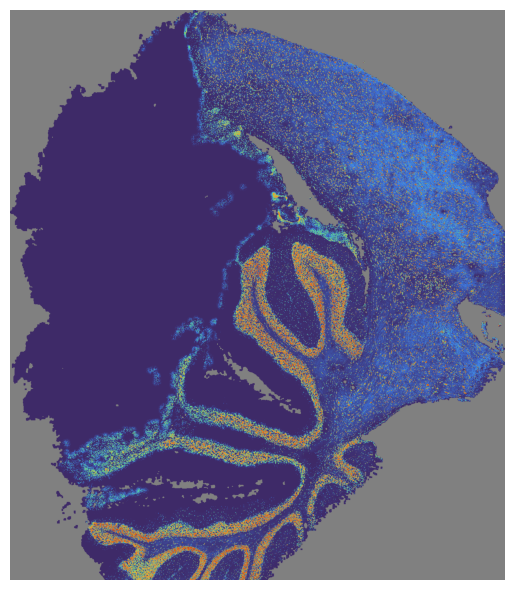

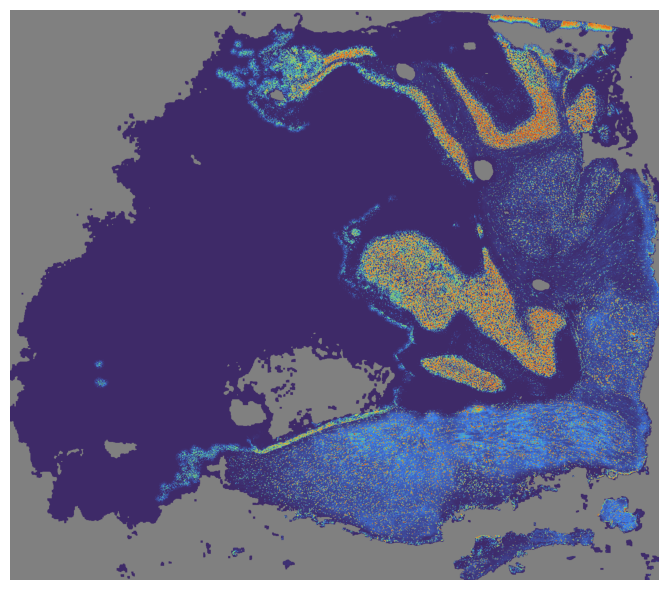

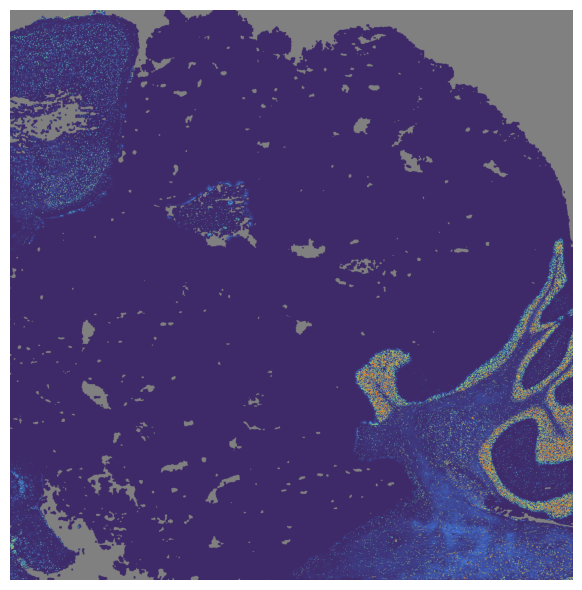

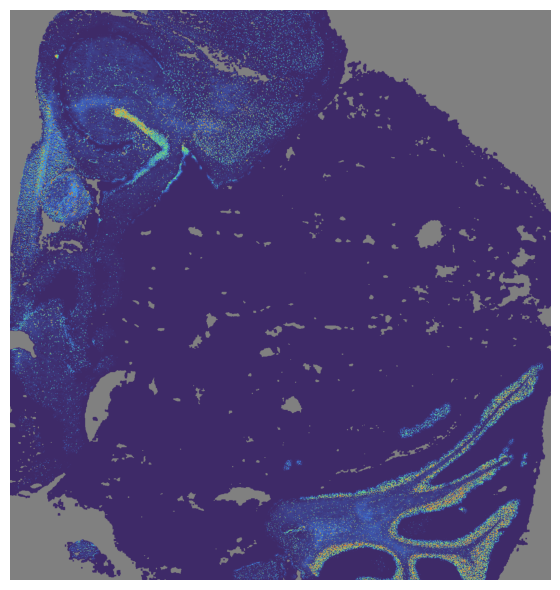

In [9]:
mapper.visualize(index=16, use_score='SpaHDmap')